# On the Analytical Solution to KdV Equation
Guorui Shen, guorui233@outlook.com

Jun 27, 2019

## Intro to KdV Equation
KdV equation is 
\begin{align}
u_t+\alpha uu_x+\beta u_{xxx}=0,
\end{align}

### One-Soliton Solution
It admits the one-soliton solution
\begin{align}
u(x,t) = \frac{c}{2}\cdot \text{sech}^2(\sqrt c\cdot\frac{\xi}{2}),
\end{align}
where $c>0$ is wave speed and $\xi =x-c\cdot t$ is a moving coordinate. The position of the wave peak at time $t$ is $x = ct$.
### Two-Soliton Solution
The two solitons travel from left to right with different speeds $c_1\geq c_2$. At $x = t = 0$, they will collide with each other. When $\frac{c_1}{c_2} > 3$, the profile has a single peak at $x=0$ and when $\frac{c_1}{c_2} < 3$, the profile has a double peak around $x=0$.

**Reference**
+ http://lie.math.brocku.ca/~sanco/solitons/kdv_solitons.php, accessed Jun 27, 2019.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm # 3D surface color
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar
import scipy.io as sio

In [2]:
def kdv_solution(x, t, c1, c2):
    xi1, xi2 = x-c1*t, x-c2*t
    a = 2*(c1-c2)*(c1*np.cosh(np.sqrt(c2)*xi2*.5)**2 + c2*np.sinh(np.sqrt(c1)*xi1*.5)**2)
    b = ((np.sqrt(c1)-np.sqrt(c2))*np.cosh((np.sqrt(c1)*xi1+np.sqrt(c2)*xi2)*.5) + 
        (np.sqrt(c1)+np.sqrt(c2))*np.cosh((np.sqrt(c1)*xi1-np.sqrt(c2)*xi2)*.5))**2
    return a/b

In [3]:
x = np.arange(-45, 15, .1)
t = np.arange(-40, 10, .1)
c1 = 1. # wave speed of the 1st soliton, peak=c1/2
c2 = .3 # wave speed of the 2nd soliton, peak=c2/2

In [4]:
u = np.zeros((len(t), len(x)))
for i in range(len(x)):
    for j in range(len(t)):
        u[j, i] = kdv_solution(x[i], t[j], c1, c2)

(500, 600)


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


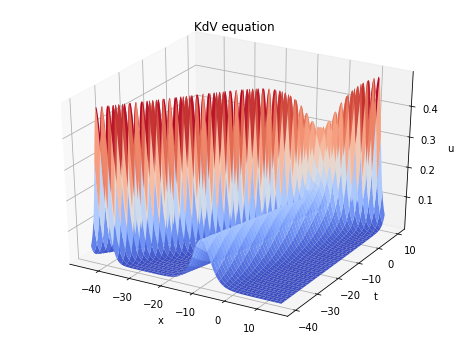

In [5]:
from matplotlib import cm # 3D surface color
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
X, T = np.meshgrid(x, t)
print(X.shape)
surf = ax.plot_surface(X, T, u, cmap=cm.coolwarm) # cmap = 'viridis'
ax.set_title('KdV equation')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
fig.show()

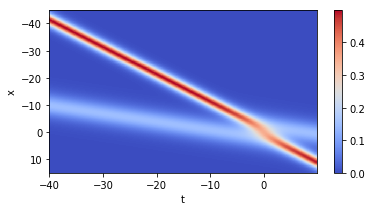

In [6]:
min_val, max_val = u.min(), u.max()
T, X = np.meshgrid(t, x)

fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax_1.set_ylabel('x')
ax_1.set_xlabel('t')
ax_1.axis([t[0], t[-1], x[-1], x[0]])

mesh_1 = ax_1.pcolormesh(T, X, u.T, vmin=min_val, vmax=max_val, cmap = cm.coolwarm)
fig.colorbar(mesh_1, ax=ax_1, shrink=1)
fig.show()

((600, 500), (600, 500), (500, 600))


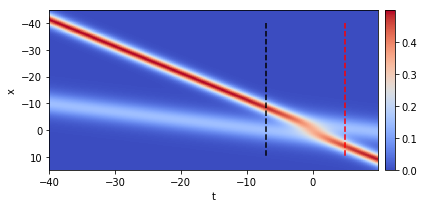

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar

vmin, vmax = u.min(), u.max()
T, X = np.meshgrid(t, x)
# reverse_x = x[::-1]
# T, X = np.meshgrid(t, reverse_x)
print(T.shape, X.shape, u.shape)

fig = plt.figure(figsize=(6, 3))
ax_actual = fig.add_subplot(111)
ax_actual.set_ylabel('x')
ax_actual.set_xlabel('t')
# ax_actual.axis([t[0], t[-1], x[0], x[-1]])
ax_actual.axis([t[0], t[-1], x[-1], x[0]])
mesh_actual = ax_actual.pcolormesh(T, X, u.T, cmap = cm.coolwarm)
ax_actual.plot([t[330], t[330]], [-40, 10], 'k--', [t[450], t[450]], [-40, 10], 'r--')
mesh_actual.set_clim(vmin,vmax)


divider = make_axes_locatable(ax_actual)
cax_val = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(mesh_actual, ax=ax_actual, cax=cax_val)
fig.tight_layout()
plt.show()

In [8]:
sio.savemat('twoSolitonKdV.mat', {'u':u, 'x':x, 't':t})